In [1]:
import numpy as np
import pandas as pd

In [2]:
data_df = pd.read_csv('auto-mpg.csv', header = 0, engine = 'python')
data_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [4]:
print('데이터셋 크기: ', data_df.shape)

데이터셋 크기:  (398, 9)


In [5]:
data_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [7]:
data_df = data_df.drop(['car_name', 'origin', 'horsepower'], axis = 1, inplace = False)

In [8]:
data_df.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [9]:
print('데이터셋 크기: ', data_df.shape)

데이터셋 크기:  (398, 6)


In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# X, Y 분할하기
Y = data_df['mpg']
X = data_df.drop(['mpg'], axis = 1, inplace = False)

In [13]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [14]:
# 선형 회귀 분석 : 모델 생성
lr = LinearRegression()

In [15]:
# 선형 회귀 분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [16]:
# 선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

In [17]:
# 평가
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 12.278, RMSE : 3.504
R^2(Variance score) : 0.808


In [18]:
print('Y 절편 값: ', np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))

Y 절편 값:  -17.55
회귀 계수 값:  [-0.14  0.01 -0.01  0.2   0.76]


In [19]:
coef = pd.Series(data = np.round(lr.coef_, 2), index = X.columns)
coef.sort_values(ascending = False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

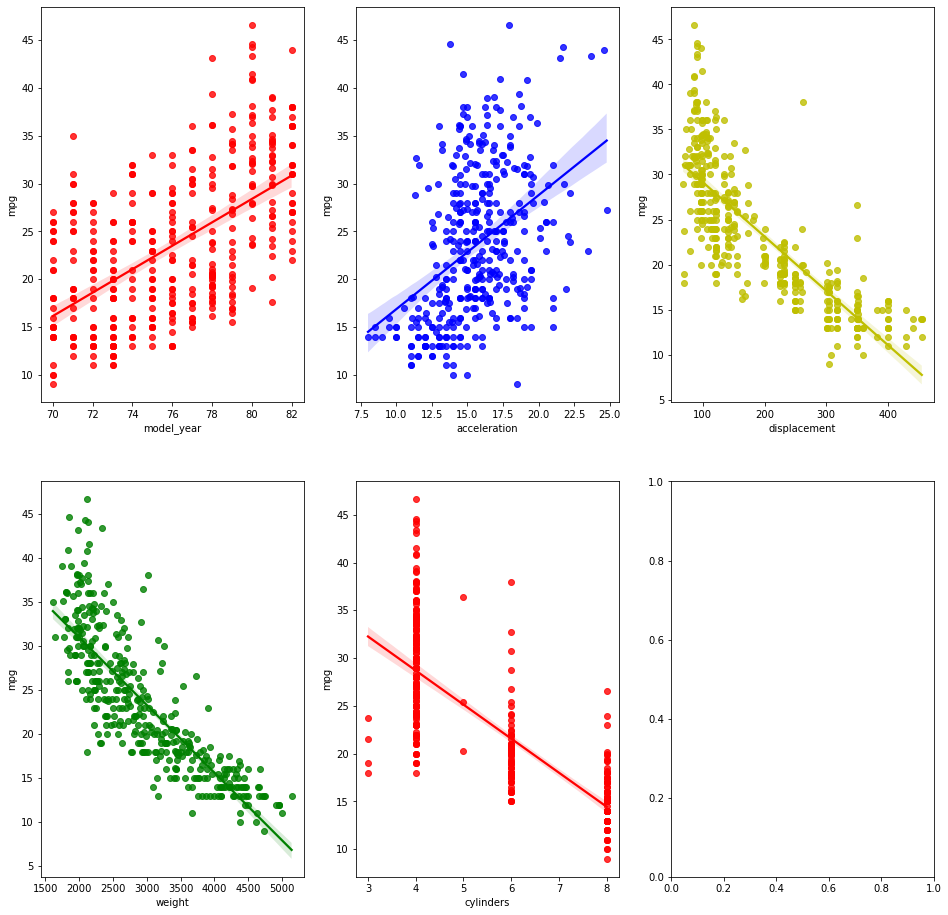

In [29]:
fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 2)
x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r']
for i, feature in enumerate(x_features):
  row = int(i/3)
  col = i%3
  sns.regplot(x = feature, y = 'mpg', data = data_df, ax = axs[row][col],
    color = plot_color[i])

In [30]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")
cylinders_1 = int(input("cylinders : "))
displacement_1 = int(input("displacement : "))
weight_1 = int(input("weight : "))
acceleration_1 = int(input("acceleration : "))
model_year_1 = int(input("model_year : "))

mpg_predict = lr.predict([[cylinders_1, displacement_1, weight_1, acceleration_1 , model_year_1]])

print("이 자동차의 예상 연비(MPG)는 %.2f입니다." %mpg_predict)

연비를 예측하고 싶은 차의 정보를 입력해주세요.


cylinders :  5
displacement :  20
weight :  3000
acceleration :  15
model_year :  78


ValueError: shapes (398,5) and (1,5) not aligned: 5 (dim 1) != 1 (dim 0)

In [31]:
from statsmodels.formula.api import ols

In [32]:
# 훈련용 데이터와 평가용 데이터 분할하기
data_train, data_test = train_test_split(data_df, test_size = 0.3, random_state = 0)

In [46]:
#변수를 넣고 빼고 할 필요없이 formaula를 구성하여 자동으로 학습을 시켜줌
lr=ols(formula='mpg ~ model_year + acceleration + displacement + weight + cylinders', data = data_train) 
#lr=ols(formula='mpg ~ model_year + acceleration + displacement + weight', data = data_train) 
#lr=ols(formula='mpg ~ model_year + acceleration + weight', data = data_train) 
result=lr.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     226.5
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           9.78e-95
Time:                        07:21:24   Log-Likelihood:                -734.44
No. Observations:                 278   AIC:                             1481.
Df Residuals:                     272   BIC:                             1503.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.5481      4.957     -3.540      0.000     -27.307      -7.789
model_year       0.7578      0.061     12.406      0.000       0.638       0.878
acceleration     0.1981      0.096      2.070      0.039       0.010       0.386
displacement     0.0075      0.009      0.865      0.388      -0.010       0.025
weight          -0.0069      0.001     -9.922      0.000      -0.008      -0.006
cylinders       -0.1371      0.391     -0.350      0.726      -0.908       0.634
==============================================================================
Omnibus:                       17.425   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.814
Skew:                           0.496   Prob(JB):                     1.83e-05
Kurtosis:                       3.948   Cond. No.                     7.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# 선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = result.predict(data_test)

# 평가
mse = mean_squared_error(data_test['mpg'], Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 12.278, RMSE : 3.504
R^2(Variance score) : 0.808


In [52]:
lr=ols(formula='mpg ~ model_year + acceleration + displacement + weight', data = data_df)
result=lr.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     414.5
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          1.59e-139
Time:                        07:24:17   Log-Likelihood:                -1053.8
No. Observations:                 398   AIC:                             2118.
Df Residuals:                     393   BIC:                             2138.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -15.1306      4.074     -3.714      0.000     -23.140      -7.121
model_year       0.7553      0.051     14.883      0.000       0.656       0.855
acceleration     0.0791      0.078      1.009      0.313      -0.075       0.233
displacement     0.0035      0.005      0.660      0.510      -0.007       0.014
weight          -0.0070      0.001    -11.707      0.000      -0.008      -0.006
==============================================================================
Omnibus:                       36.743   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.076
Skew:                           0.624   Prob(JB):                     6.66e-13
Kurtosis:                       4.351   Cond. No.                     7.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# 선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = result.predict(data_test)

# 평가
mse = mean_squared_error(data_test['mpg'], Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 11.749, RMSE : 3.428
R^2(Variance score) : 0.816


In [56]:
lr=ols(formula='mpg ~ model_year + acceleration + weight', data = data_df)
result=lr.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     553.3
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          7.72e-141
Time:                        07:25:04   Log-Likelihood:                -1054.0
No. Observations:                 398   AIC:                             2116.
Df Residuals:                     394   BIC:                             2132.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -14.7051      4.020     -3.658      0.000     -22.608      -6.802
model_year       0.7492      0.050     15.025      0.000       0.651       0.847
acceleration     0.0560      0.070      0.799      0.425      -0.082       0.194
weight          -0.0066      0.000    -28.756      0.000      -0.007      -0.006
==============================================================================
Omnibus:                       38.719   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.259
Skew:                           0.644   Prob(JB):                     8.22e-14
Kurtosis:                       4.406   Cond. No.                     7.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# 선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = result.predict(data_test)

# 평가
mse = mean_squared_error(data_test['mpg'], Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 11.727, RMSE : 3.424
R^2(Variance score) : 0.816


In [58]:
lr=ols(formula='mpg ~ model_year + weight', data = data_df)
result=lr.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     830.4
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          3.26e-142
Time:                        07:25:10   Log-Likelihood:                -1054.3
No. Observations:                 398   AIC:                             2115.
Df Residuals:                     395   BIC:                             2127.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.1980      3.968     -3.578      0.000     -21.998      -6.398
model_year     0.7566      0.049     15.447      0.000       0.660       0.853
weight        -0.0067      0.000    -31.161      0.000      -0.007      -0.006
==============================================================================
Omnibus:                       41.827   Durbin-Watson:                   1.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.734
Skew:                           0.665   Prob(JB):                     1.19e-15
Kurtosis:                       4.541   Cond. No.                     7.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
# 선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = result.predict(data_test)

# 평가
mse = mean_squared_error(data_test['mpg'], Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 11.590, RMSE : 3.404
R^2(Variance score) : 0.819
